In [609]:
# KNN Classification imports
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')

In [610]:
filename = 'diabetes.csv'
df = read_csv(filename)

df.shape
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [611]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [612]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [613]:
df.shape

(768, 9)

Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI are ratios, and if they are zero they are missing. 
It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values


In [614]:
#replace 0 with NaN
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

#count the number of NaN values in each column
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Lets figure out what to fill these NaN values with by observing the data distribution

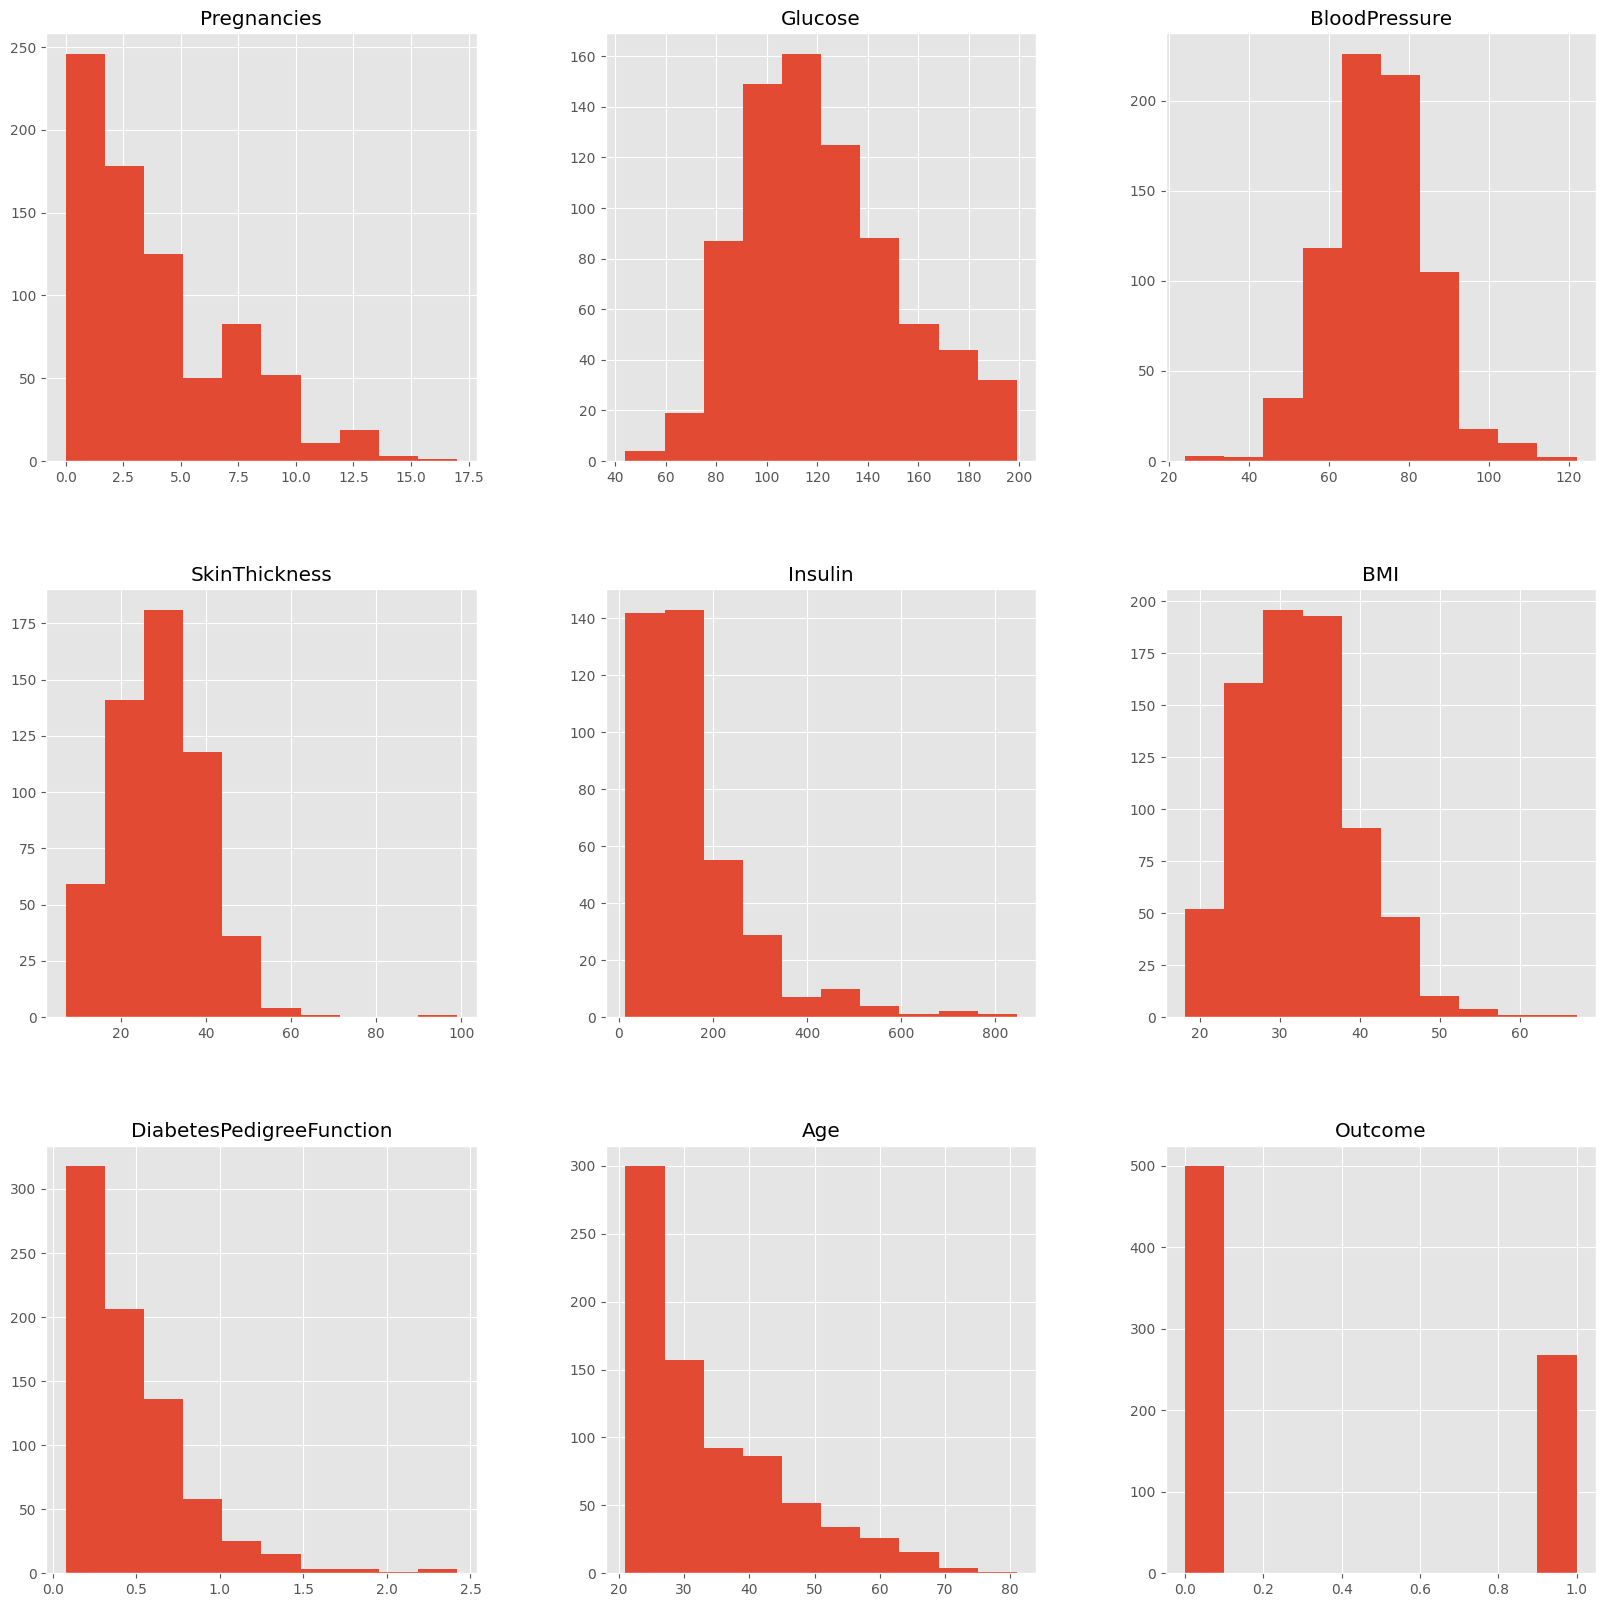

In [615]:
p = df.hist(figsize = (20,20))

After lots of experimentation, due to the amount of rows missing insulin and skin thickness, impuning those sets of data with the 

In [616]:
#lets drop the rows with missing values(SkinThickness and Insulin)
df = df.dropna()

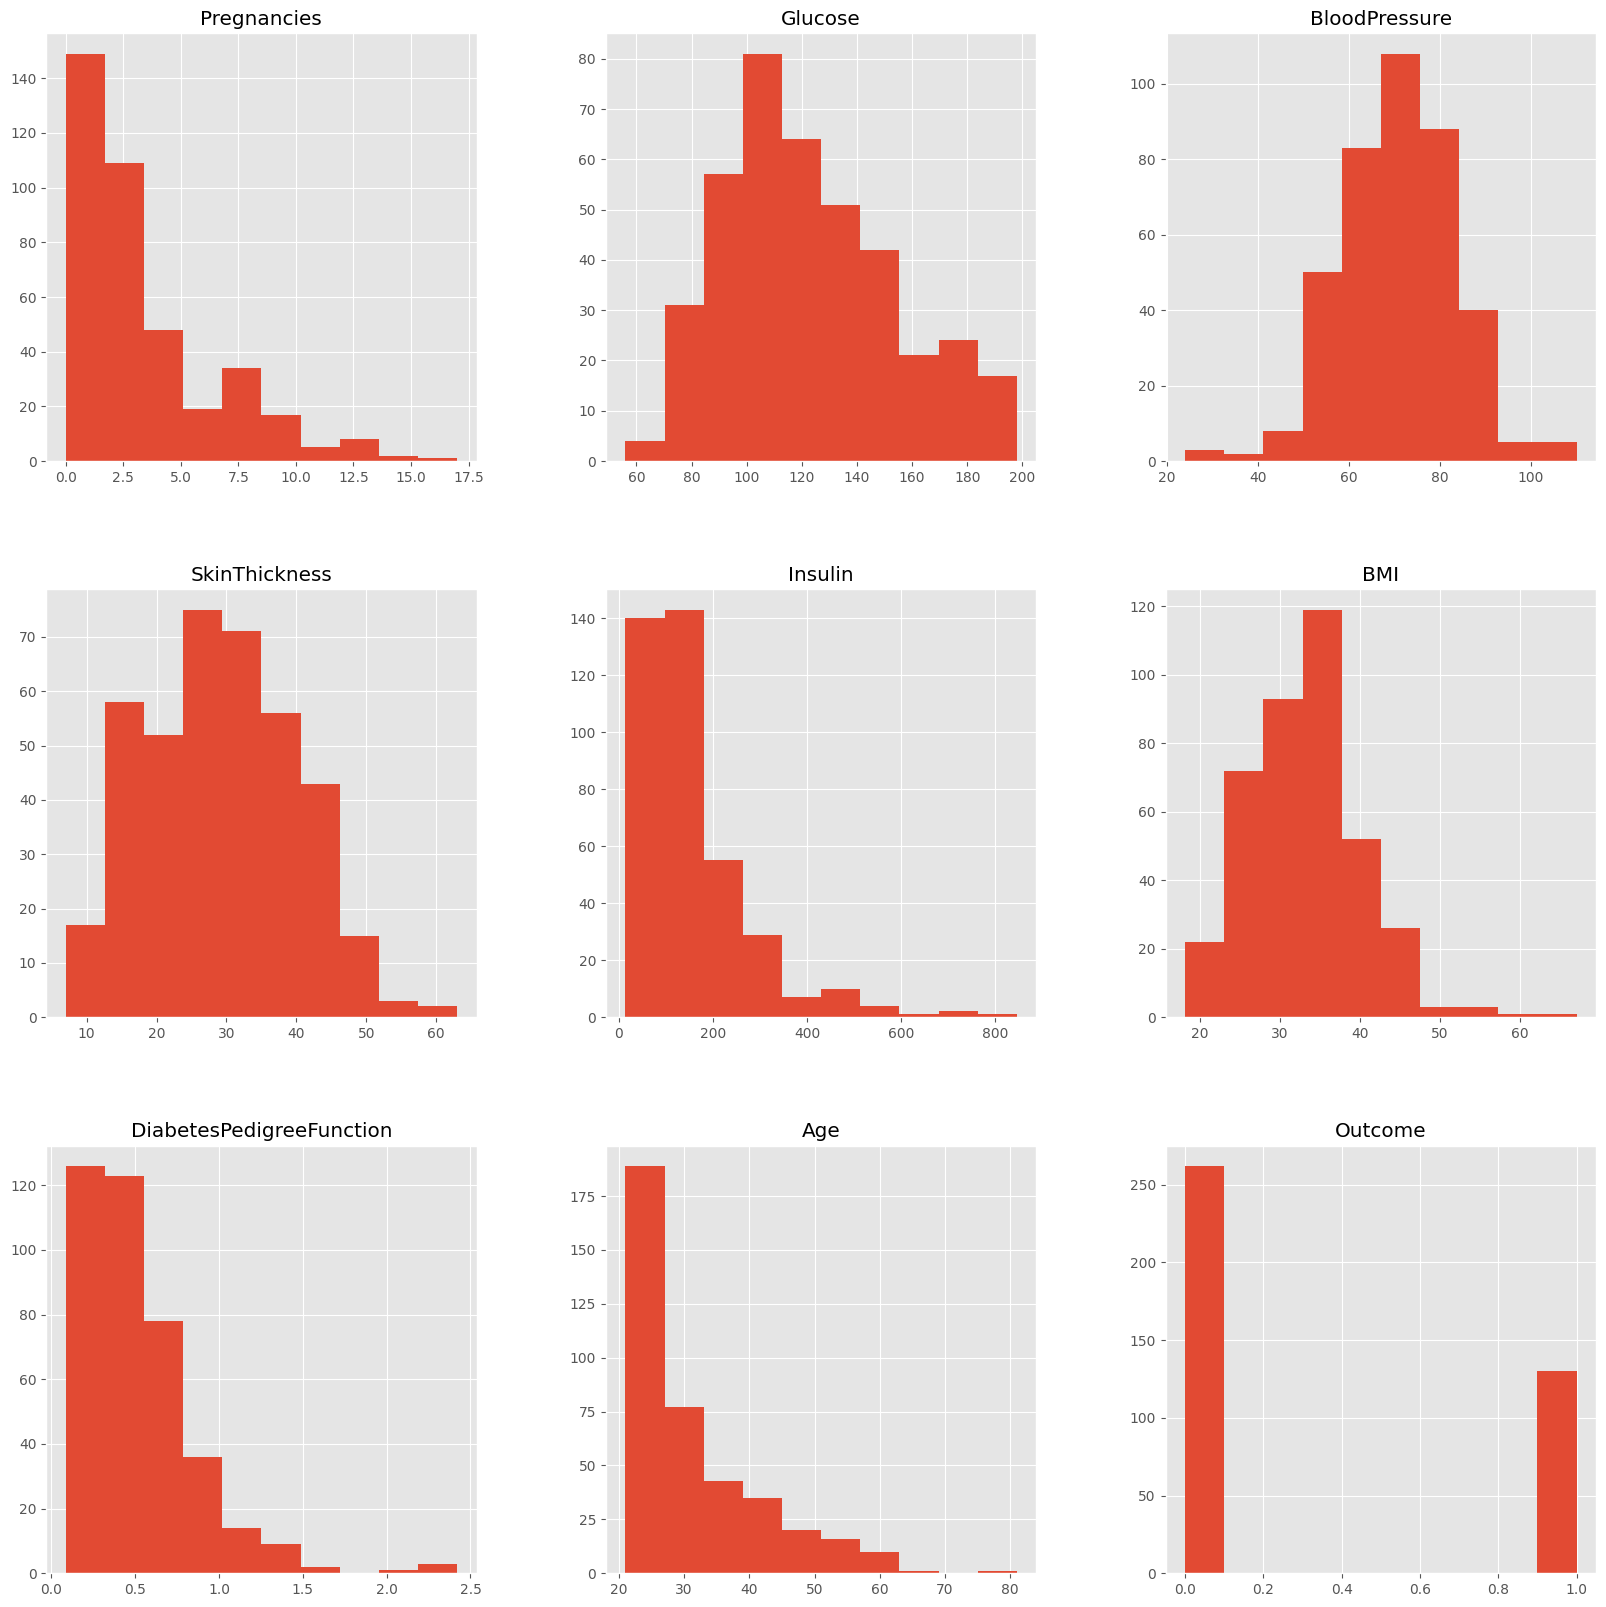

In [617]:
p = df.hist(figsize = (20,20))

In [618]:
#getting the shape
df.shape

(392, 9)

In [619]:
X = df.drop('Outcome' , axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59


In [620]:
y = df['Outcome']
y.head()

3     0
4     1
6     1
8     1
13    1
Name: Outcome, dtype: int64

For Glucose and blood pressure, there is a relatively normal distribution so we can replace the NaN values with the mean for that data

In [621]:
#set variables for kfold and model
kfold = KFold(n_splits=5, random_state=2, shuffle=True)
model = KNeighborsClassifier(n_neighbors=17)

In [622]:
array = df.values
X = array[:,0:8]
Y = array[:,8]
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print(results.mean())

[0.79746835 0.78481013 0.69230769 0.80769231 0.75641026]
0.7677377474845828


Lets try scaling the data

In [623]:
#standard scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
results = cross_val_score(model, scaled_data, Y, cv=kfold)
print(results)
print(results.mean())

[0.78481013 0.82278481 0.71794872 0.82051282 0.74358974]
0.7779292437520287


In [624]:
#robust scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
results = cross_val_score(model, scaled_data, Y, cv=kfold)
print(results)
print(results.mean())

[0.74683544 0.81012658 0.69230769 0.75641026 0.76923077]
0.7549821486530346


In [625]:
#minmax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
results = cross_val_score(model, scaled_data, Y, cv=kfold)
print(results)
print(results.mean())

[0.7721519  0.81012658 0.75641026 0.80769231 0.79487179]
0.7882505679974035


Standard Scaling seems to perform the best for this dataset right now with a mean accuracy of 0.7651736449204803 at 3 Nearest Neighbors

Next we are going to try adjusting the amount of neighbors between 1 and 40

In [ ]:
#Notable results:
#0.7729308666017527 @ 11 neighbors
#0.7857189224277832 @ 15 neighbors
#0.7882505679974035 @ 17 neighbors

0.7882505679974035 was the best accuracy, using minmax scaling @ 17 neighbors, I believe minmax won out in the end because of its ability to "include robustness to very small standard deviations of features and preserving zero entries in sparse data.", for columns like the number of pregnancies, this was extremely important